In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
bench = pd.read_csv('Bench.csv')
deadlift = pd.read_csv('Deadlift.csv')
squat = pd.read_csv('Squat.csv')

In [6]:
def process_signal(sig, interval, normalize=False):
    if normalize: 
        mean = np.mean(sig)
        std = np.std(sig)
        sig = (sig - mean)/std
    if interval not in sig.shape:
        sig = sig.reshape(-1, 1)
    pad_len = interval - (sig.shape[0] % interval)
    if pad_len != interval:
        padding = np.zeros((pad_len, sig.shape[1]))
        padding[:, :] = sig[-1, -1]
        sig = np.concatenate([sig, padding], axis=0)
    sig = sig.reshape(-1, interval, sig.shape[1])
    sig = np.squeeze(sig)
    return sig

def get_mean_std_tensor(sig, interval, normalize=False):
    temp = process_signal(sig, interval, normalize)
    tensor = np.vstack([np.average(temp, axis=0), np.std(temp, axis=0)])
    tensor = np.average(tensor, axis=1)
    return tensor

In [7]:
bench

,Time,Accel_X,Accel_Y,Accel_Z,Gyro_X,Gyro_Y,Gyro_Z
0,5252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5368,0.066528,-0.900513,0.694214,-42.724606,-64.758301,-34.545898
2,5484,0.036133,-0.868164,0.473145,-3.540039,-14.282226,-5.798339
3,5600,0.026001,-0.921387,0.388794,-19.287109,-6.042480,-34.729004
4,5716,-0.095703,-0.871216,0.467896,-23.986814,2.319336,-24.780272
...,...,...,...,...,...,...,...
367,47827,-0.265991,0.703125,0.499023,37.841797,-37.292480,-2.197266
368,47943,-0.245850,0.641235,0.723389,33.264160,-50.842281,-13.977050
369,48059,-0.438843,0.541504,0.700317,25.146482,-24.475096,-12.573241
370,48175,-0.448853,0.529053,0.685791,11.108397,-6.042480,-0.061035


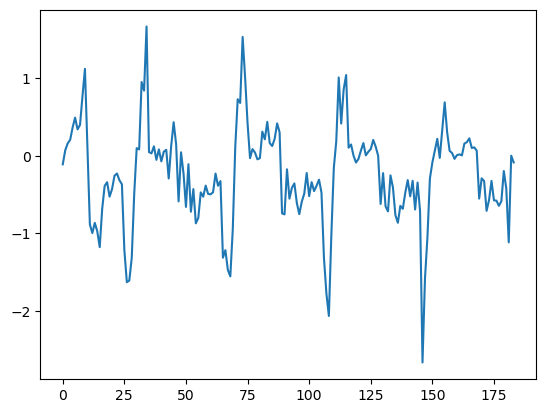

In [19]:
sig = deadlift['Accel_Y'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

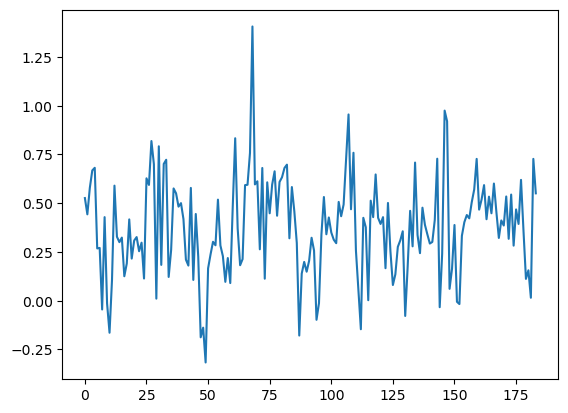

In [23]:
sig = deadlift['Accel_X'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

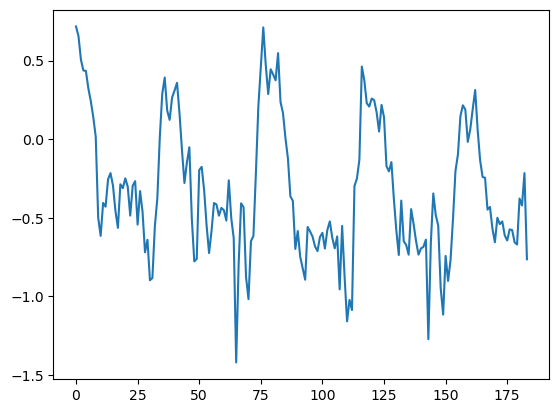

In [24]:
sig = deadlift['Accel_Z'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

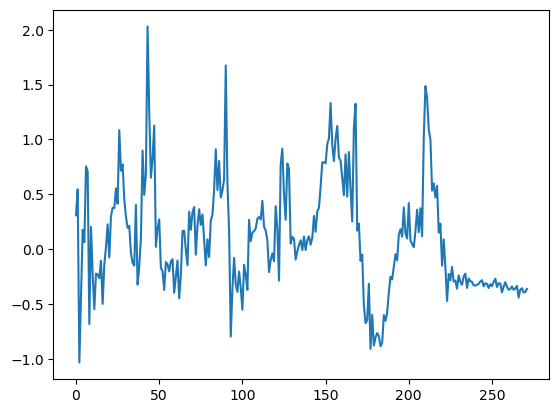

In [25]:
sig = bench['Accel_X'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

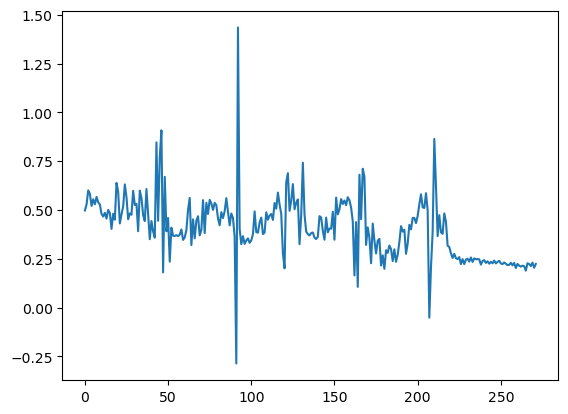

In [26]:
sig = bench['Accel_Y'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

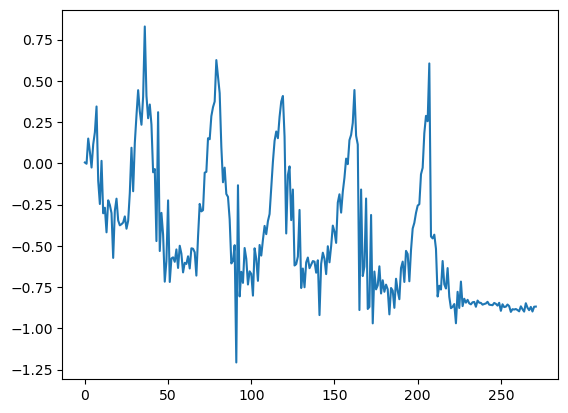

In [27]:
sig = bench['Accel_Z'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

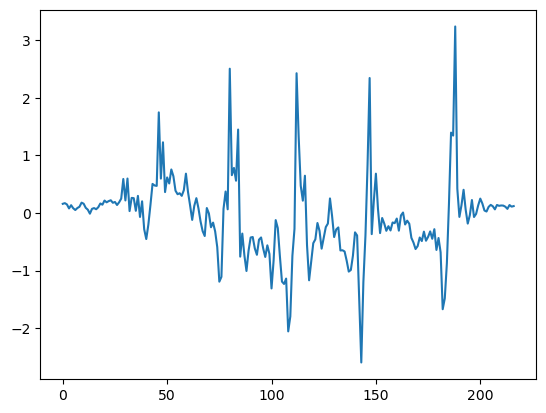

In [28]:
sig = squat['Accel_X'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

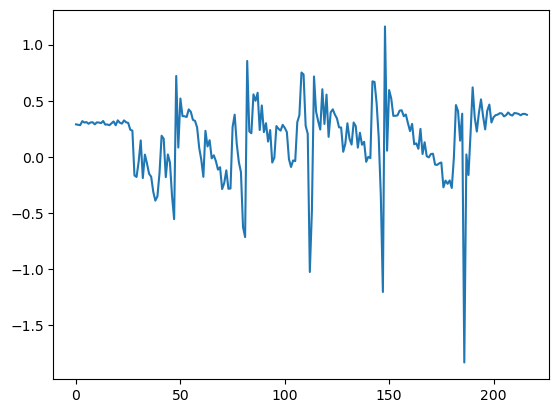

In [29]:
sig = squat['Accel_Y'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
plt.plot(sig[cutoff:-cutoff])

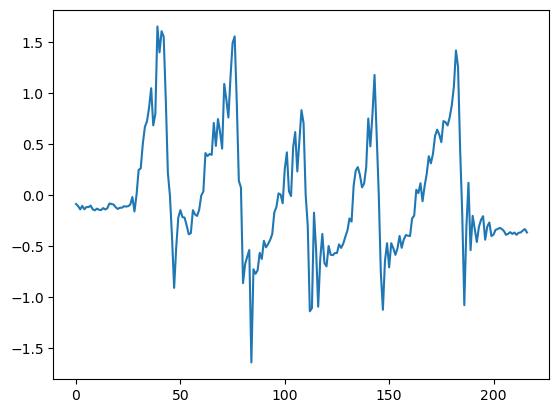

In [47]:
sig = squat['Accel_Z'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
sig = sig[cutoff:-cutoff]
plt.plot(sig)

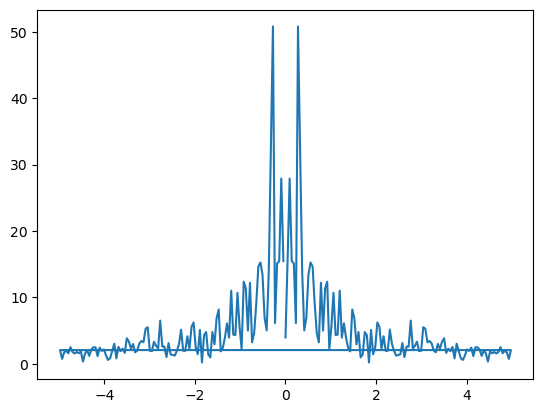

In [50]:
timestep = 1/10
n = len(sig)
freq = np.fft.fftfreq(n, d=timestep)
fft = np.fft.fft(sig)

#plt.subplot(2, 1, 1)
plt.plot(freq, np.sqrt(fft.real**2 + fft.imag**2))
#plt.plot(freq, np.arctan(fft.imag, fft.real))

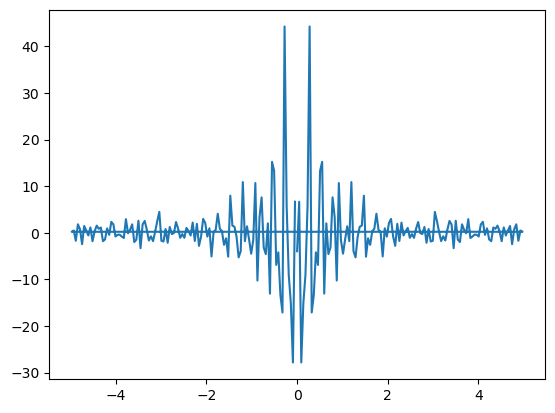

In [41]:
timestep = 1/10
n = len(sig)
freq = np.fft.fftfreq(n, d=timestep)
fft = np.fft.fft(sig)

plt.plot(freq, fft)

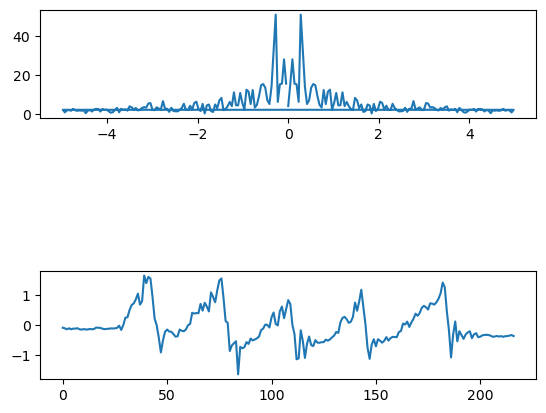

In [64]:
sig = squat['Accel_Z'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
sig = sig[cutoff:-cutoff]

timestep = 1/10
n = len(sig)
freq = np.fft.fftfreq(n, d=timestep)
fft = np.fft.fft(sig)

plt.subplot(3, 1, 1)
mag = np.sqrt(fft.real**2 + fft.imag**2)
plt.plot(freq, mag)

#plt.subplot(3, 1, 2)
#plt.plot(freq, np.arctan(fft.imag, fft.real))

plt.subplot(3, 1, 3)
plt.plot(sig)


In [65]:
np.abs(freq[np.argsort(mag)])[0:10:2]

array([1.84331797, 4.47004608, 3.91705069, 4.93087558, 3.73271889])

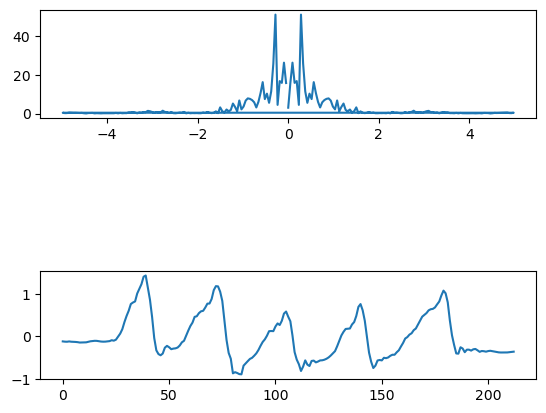

In [67]:
sig = squat['Accel_Z'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
sig = sig[cutoff:-cutoff]

l = []
k = 5
for i in range(0, sig.shape[0] - k + 1):
    l.append(np.mean(sig[i:i+k]))

sig = np.array(l)

timestep = 1/10
n = len(sig)
freq = np.fft.fftfreq(n, d=timestep)
fft = np.fft.fft(sig)

plt.subplot(3, 1, 1)
mag = np.sqrt(fft.real**2 + fft.imag**2)
plt.plot(freq, mag)

#plt.subplot(3, 1, 2)
#plt.plot(freq, np.arctan(fft.imag, fft.real))

plt.subplot(3, 1, 3)
plt.plot(sig)


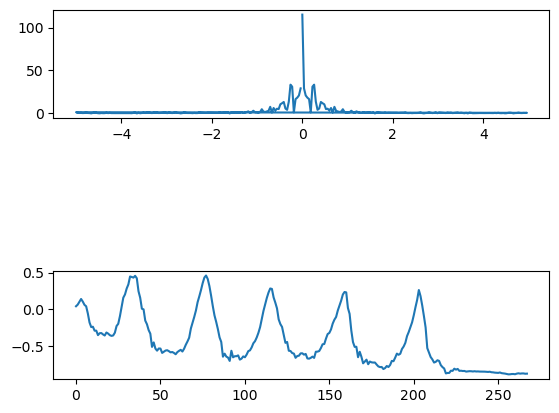

In [69]:
sig = bench['Accel_Z'].to_numpy()
sig = (sig - sig.mean())/np.std(sig)
cutoff = 50
sig = sig[cutoff:-cutoff]

l = []
k = 5
for i in range(0, sig.shape[0] - k + 1):
    l.append(np.mean(sig[i:i+k]))

sig = np.array(l)

timestep = 1/10
n = len(sig)
freq = np.fft.fftfreq(n, d=timestep)
fft = np.fft.fft(sig)

plt.subplot(3, 1, 1)
mag = np.abs(fft)
plt.plot(freq, mag)

#plt.subplot(3, 1, 2)
#plt.plot(freq, np.arctan(fft.imag, fft.real))

plt.subplot(3, 1, 3)
plt.plot(sig)
